In [83]:
import pandas as pd
import numpy as np

import ipywidgets as widgets
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html
# https://zhuanlan.zhihu.com/p/263411257
# interactive programming package

import matplotlib.pyplot as plt
# https://matplotlib.org/stable/users/explain/interactive.html

%matplotlib inline
# How to use the magic line https://blog.csdn.net/weixin_42311095/article/details/85009922


--Special notes
pandas calculation:
use iloc[row,column] to extract the data.
--Single data point
pd.iloc[row,column].'values'

In [84]:
class Data_Class:
    titles = ["current/pA","voltage/mV"]
    x_label = "t/ ms"
    data=[]
    current = []
    voltage = [] #stored in python list 1xN

    max_voltage = []
    
    spike_number = 0

    def __init__(self,file_path):
        # set titles, data, current, voltage
        def read_data(data_path):
            self.data = pd.read_csv(data_path,header=None,sep='\t',index_col=None)
            self.data.columns=[self.titles]
            # print the result
            # print(data.head())
            # backup plan
            # data = np.loadtxt("N1.txt")
            # df = pd.DataFrame(data=data)
            def data_to_list(data):
                '''
                pd Nx1-> list 1xN
                '''
                data.transpose()
                data = data.astype(float)
                return data

            self.current = data_to_list(self.data.loc[:,self.titles[0]])
            self.voltage = data_to_list(self.data.loc[:,self.titles[1]])

        read_data(file_path)
    def plot_data(self):
        # fig, axs = plt.subplots(2, 1, figsize=(4, 3), layout='constrained')
        plt.subplot(211)
        plt.plot(self.current)
        # figure configuration
        # plt.xlabel(x_label)
        plt.ylabel(self.titles[0])

        plt.subplot(212)
        plt.plot(self.voltage)
        # figure configuration
        plt.xlabel(self.x_label)
        plt.ylabel(self.titles[1])
        
        plt.show()
    def find_first_max_v(self,start_search=2000,comparison_interval=150):
        '''
        Using the voltage plot to find the first maximum voltage peack

        @ data: should be 1D, and should be voltage
        @ start_search: the index where search is started
        @ comparison_interval: the interval which data[i] is greater than the following data[i+1,i+comparison_interval]
        '''
        first_max = 0
        for i in range(start_search,self.voltage.__len__()):
            flag = False
            while (all(self.voltage[i+1:i+comparison_interval].values<self.voltage.iloc[i,:].values)):
                first_max=self.voltage.iloc[i,:].values
                flag=True
                # print("max index",i)
                self.max_voltage.append([i,float(self.voltage.iloc[i,:].values)])
                break
            if (flag):
                break
        # print("max voltage",first_max)
    def find_other_maximum_points(self,jump=100,end_search=4000):
        '''
        @ jump: to add some value to peak, and continue the spike finding algorithm
        '''
        if self.max_voltage == []:
            self.find_first_max_v()
            
        index = self.max_voltage[0][0]
        spike_count = 1
        while index<end_search:
            self.find_first_max_v(index+jump)
            spike_count += 1
            index = self.max_voltage[spike_count-1][0]
    def voltage_cleaning(self,removed_index_range=[3900,6000]):
        remove_index=[]
        for i in range(len(self.max_voltage)):
            if self.max_voltage[i][0]>removed_index_range[0] and self.max_voltage[i][0]<removed_index_range[1]:
                remove_index.append(i)
        remove_index.reverse()
        for j in remove_index:
            self.max_voltage.remove(self.max_voltage[j])
        print("the peaks are: ",self.max_voltage)

        self.spike_number=len(self.max_voltage)
    
    def plot_max_voltage(self):
        def extract_x_y():
            x=[]
            y=[]
            for i in range(len(self.max_voltage)):
                x.append(self.max_voltage[i][0])
                y.append(self.max_voltage[i][1])
            return np.array(x),np.array(y)
        x,y=extract_x_y()
        plt.scatter(x,y)
    def spike_extract_from_peak(self,peak_index,lower_bond=100,upper_bond=150):
        spike_train = self.voltage.loc[peak_index-lower_bond:peak_index+upper_bond,:]
        #reset index
        spike_train = spike_train.reset_index(drop=True)
        return spike_train
    def spike_train_extraction(self):
        data = pd.DataFrame()
        for i in range(len(self.max_voltage)):
            peak_index=self.max_voltage[i][0]
            spike=self.spike_extract_from_peak(peak_index)
            data.insert(loc=i, column=str(i), value=spike)
        plt.plot(data)
        return data

            
                       


the peaks are:  [[2246, 34.24292], [2453, 28.16992], [2744, 27.07129], [3061, 27.02551], [3416, 26.56775], [3766, 25.34705]]


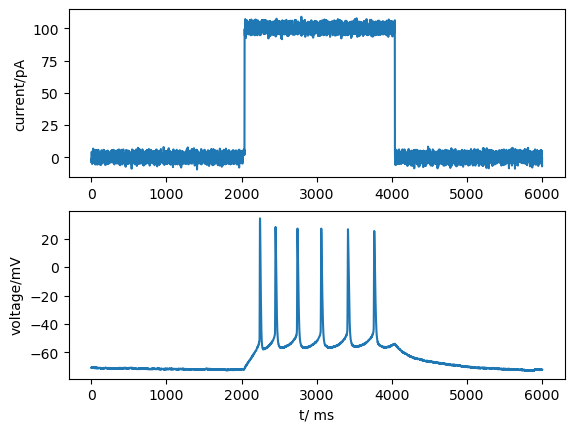

spike number 6


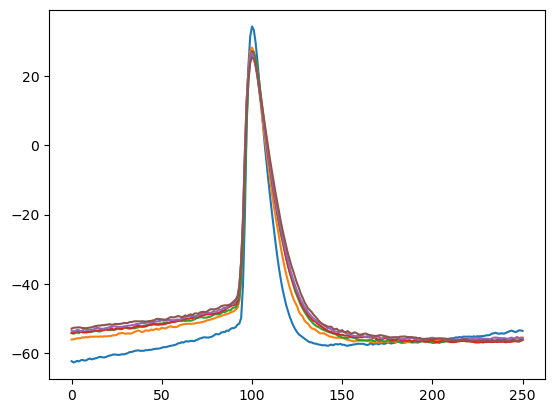

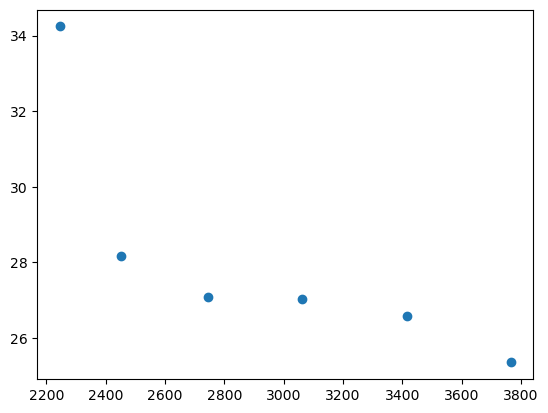

In [85]:
N1 = Data_Class("N1.txt")
N1.find_other_maximum_points()
N1.voltage_cleaning()
N1.plot_data()
N1.spike_train_extraction()
plt.figure()
N1.plot_max_voltage()
print("spike number",N1.spike_number)
N1.spike_train_extraction()
# Don't know why I can't run the cell again
